<a href="https://colab.research.google.com/github/azdinelaaouissi/codealpha_tasks_MachineLearning/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import  pandas  as  pd
import  numpy  as  np
import  seaborn  as  sns
import  matplotlib.pyplot as  plt
from  sklearn.model_selection import  train_test_split
from  sklearn.tree import  DecisionTreeClassifier
from  sklearn.metrics import  accuracy_score,mean_squared_error,mean_absolute_error
from  sklearn.metrics import  explained_variance_score,classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [100]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/train.csv")

In [101]:
df.shape

(100000, 28)

In [102]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [103]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [104]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [105]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [108]:
del_col = [
    'ID', 'Customer_ID', 'Month','Name','SSN', 'Credit_Mix',
    'Payment_Behaviour', 'Changed_Credit_Limit', 'Monthly_Balance', 'Type_of_Loan'
]
df.drop(del_col,axis=1,inplace=True)

In [109]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,4.0,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,4.0,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,4.0,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,4.0,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,4.0,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,Good


In [110]:
df.duplicated().sum()

0

In [111]:
df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Credit_Score                    0
dtype: int64

In [112]:
df["Age"]=df["Age"].str.replace("_","").astype(int)
df = df[(df["Age"] > 18) & (df["Age"] < 80)]

In [113]:
df['Occupation'].replace('_______', 'Non specific', inplace=True)


In [114]:
df["Annual_Income"]=df["Annual_Income"].str.replace("_","").astype(float)


In [115]:
df['Monthly_Inhand_Salary'].fillna(df["Annual_Income"]/12, inplace=True)

In [116]:

df.loc[df["Num_Bank_Accounts"] <= 0, "Num_Bank_Accounts"] = np.nan


In [117]:
df.loc[(df['Delay_from_due_date'] < 0) , 'Delay_from_due_date'] = np.nan


In [118]:
df["Num_of_Loan"]=df["Num_of_Loan"].str.replace("_","").astype(int)


In [119]:
df.loc[df["Num_of_Loan"]<0,"Num_of_Loan"]=np.nan

In [120]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].str.replace("_","").astype(float)

In [121]:
df.loc[df["Num_of_Delayed_Payment"]<0,"Num_of_Delayed_Payment"]=np.nan

In [122]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].str.replace("_","").astype(float)

In [123]:
def  convert_age_to_years(age):
  if  age!="nan":
    years,months=age.split('Years and ')
    years=int(years)
    months=int(months.split(" ")[0])
    return  str(years+months/12)
  else:
    return  None

df ['Credit_History_Age'] = df['Credit_History_Age'].astype(str).apply(convert_age_to_years).astype(float)



In [124]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("_","").astype(float)

In [125]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [126]:
df.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Credit_Score                0
dtype: int64

In [127]:
numerical_cols=df.select_dtypes(include=["int64","float64"]).columns
categorical_cols=df.select_dtypes(include=["object"]).columns
df_numerical = df[numerical_cols]
df_categorical = df[categorical_cols]

In [128]:
print(numerical_cols)
print(categorical_cols)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Total_EMI_per_month', 'Amount_invested_monthly'],
      dtype='object')
Index(['Occupation', 'Payment_of_Min_Amount', 'Credit_Score'], dtype='object')


In [129]:
import warnings
warnings.filterwarnings("ignore")

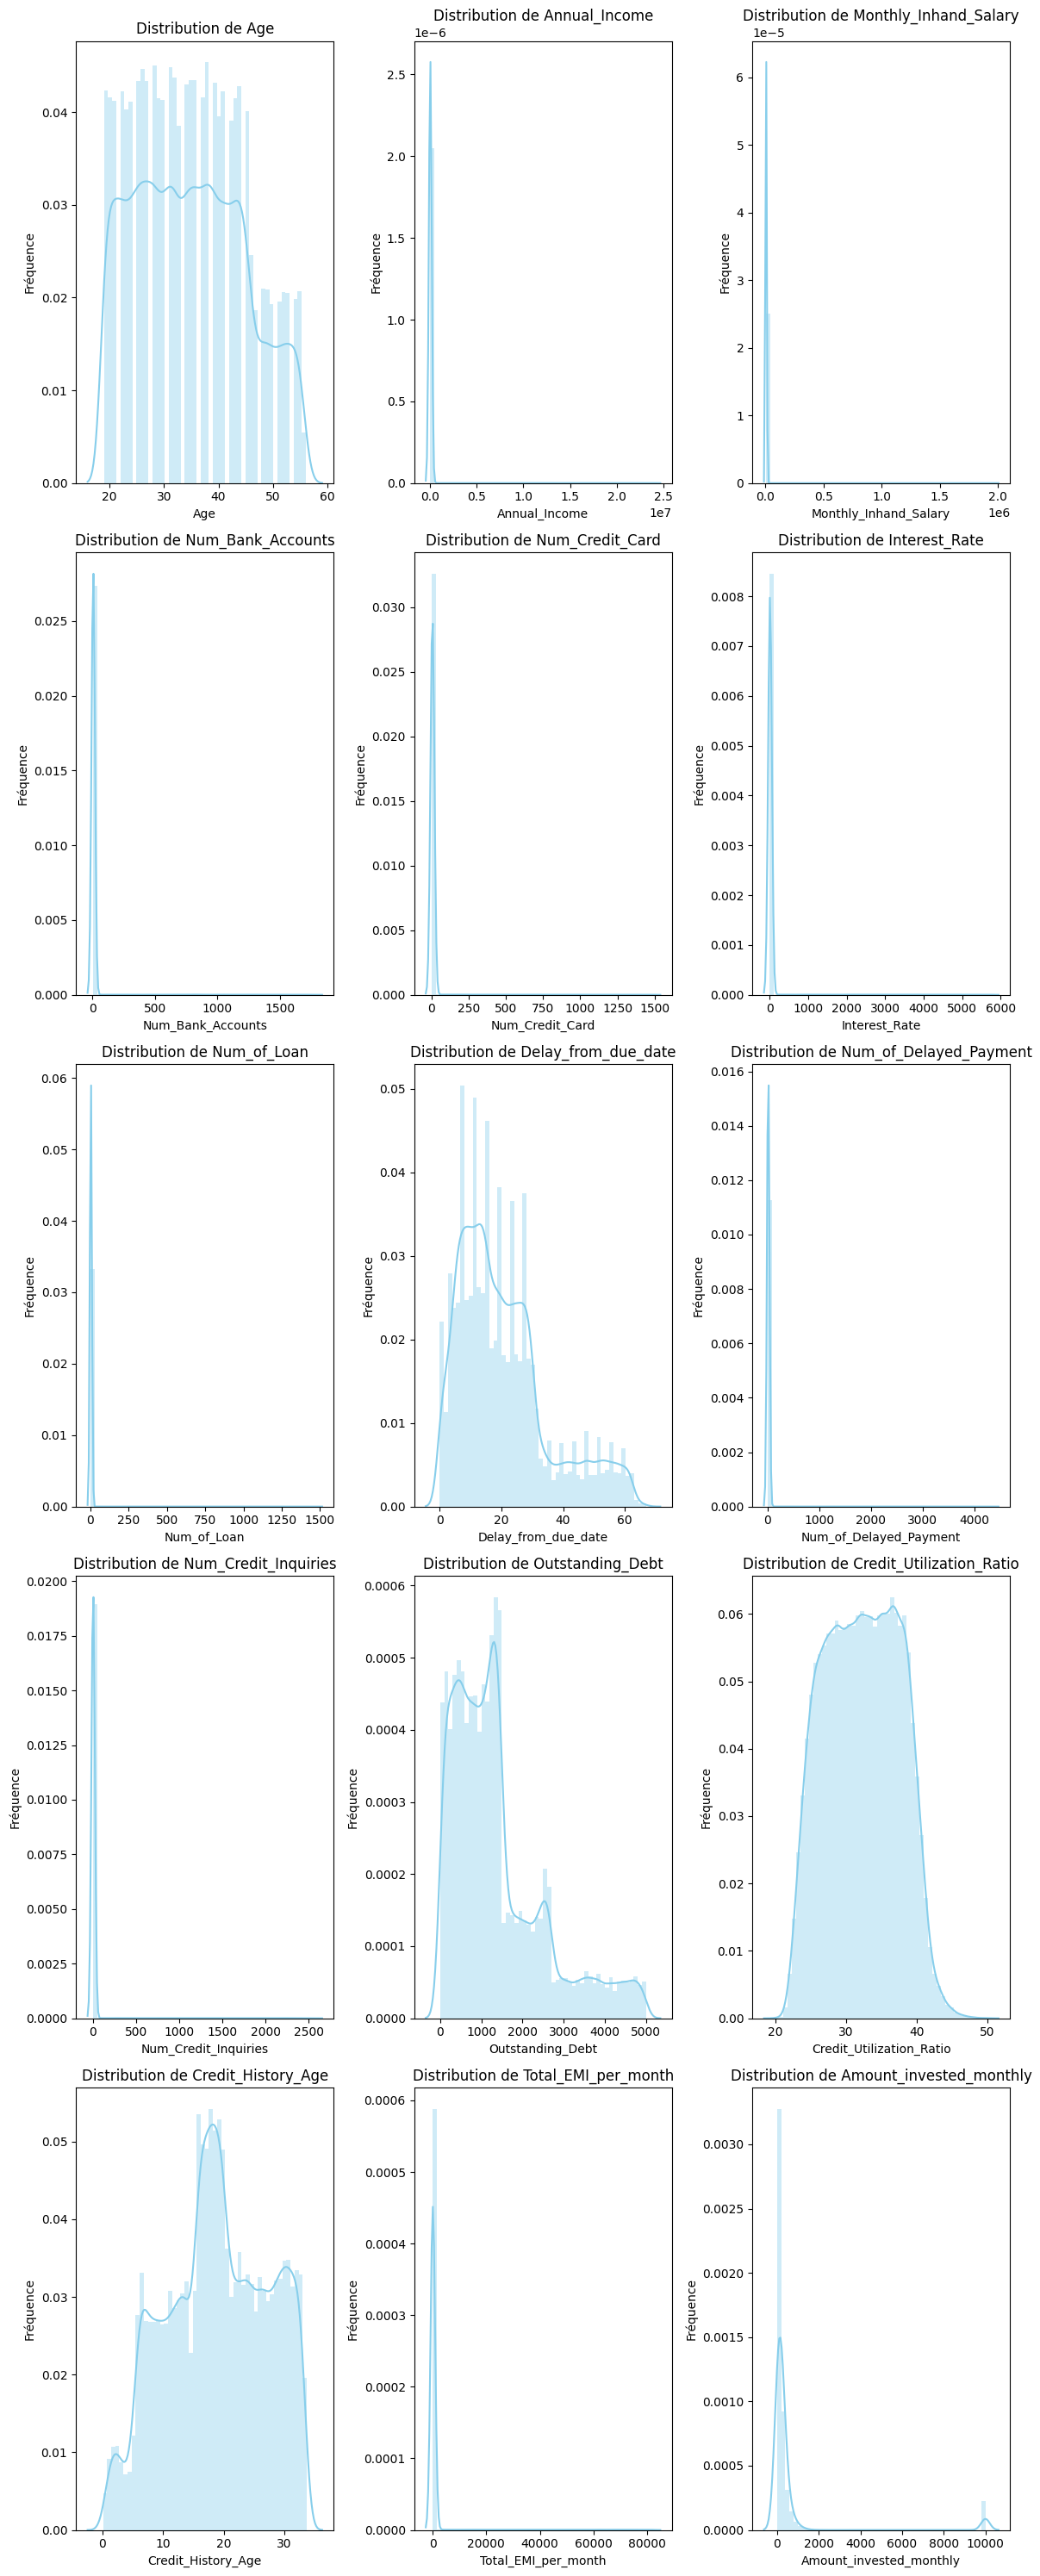

In [130]:


num_cols = ["Age", "Monthly_Inhand_Salary", "Num_of_Loan", "Num_Credit_Inquiries", "Credit_History_Age","Outstanding_Debt"]
fig, axs = plt.subplots(nrows=len(numerical_cols)//3 + len(numerical_cols)%3, ncols=3, figsize=(12, 6 * (len(numerical_cols)//3 + len(numerical_cols)%3)))

index = 0
for col in numerical_cols:
    row = index // 3
    cl = index % 3
    sns.distplot(df[col], kde=True, color='skyblue', ax=axs[row, cl])
    axs[row, cl].set_title(f'Distribution de {col}')
    axs[row, cl].set_xlabel(col)
    axs[row, cl].set_ylabel('Fréquence')
    index += 1

plt.tight_layout()
plt.show()

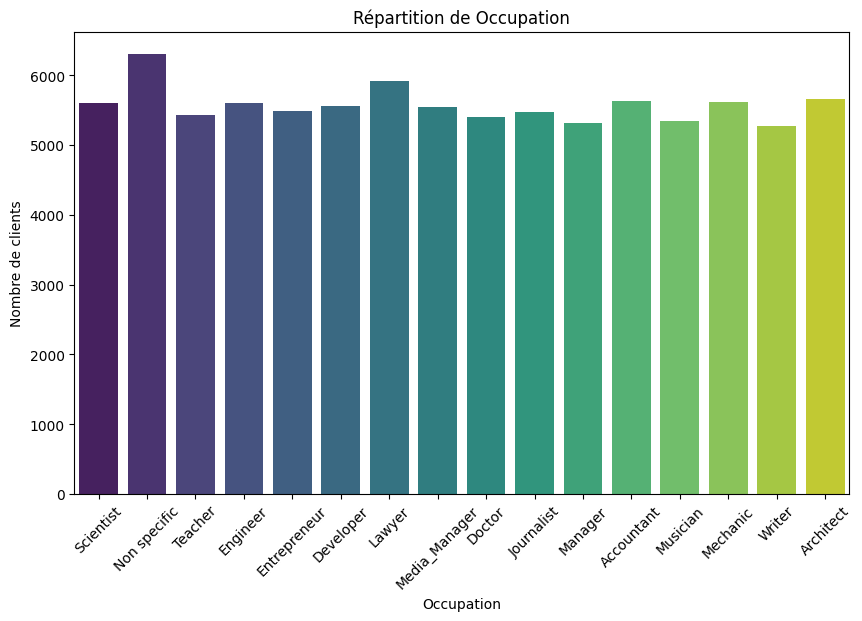

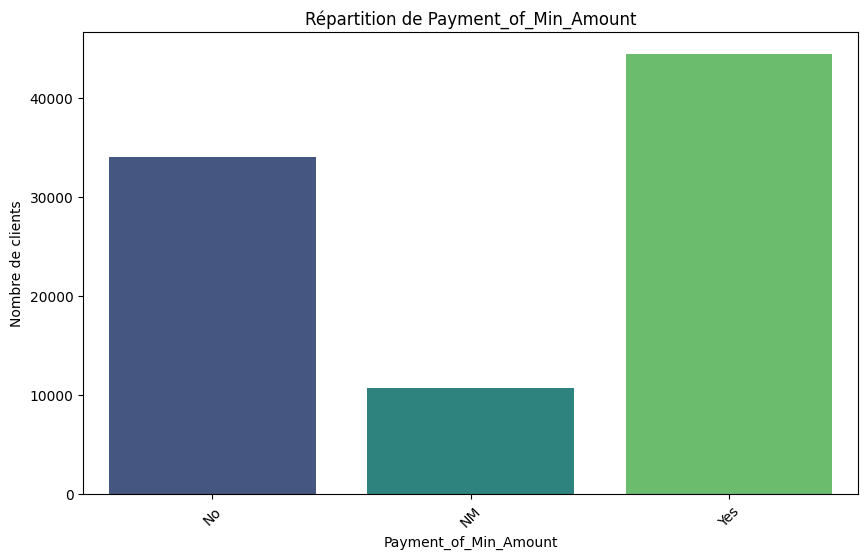

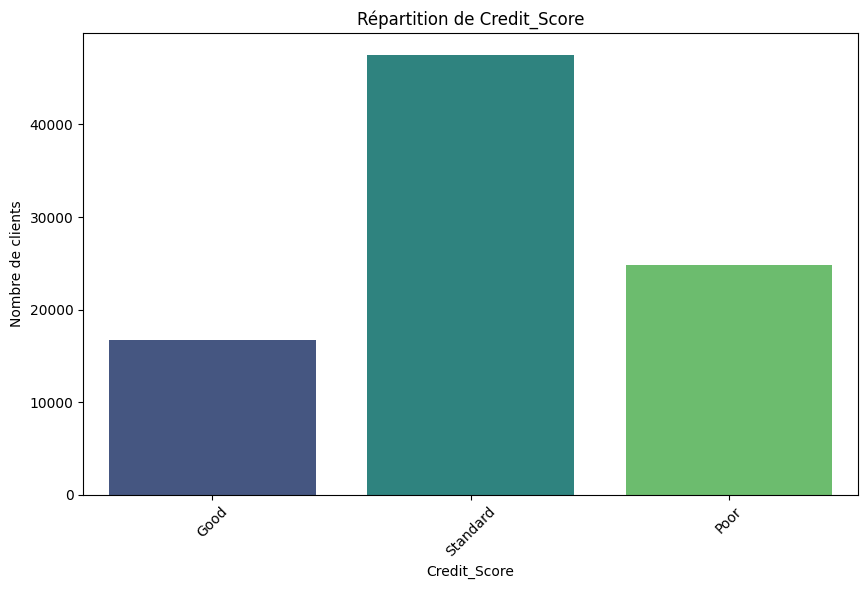

In [131]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Répartition de {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre de clients')
    plt.xticks(rotation=45)
    plt.show()


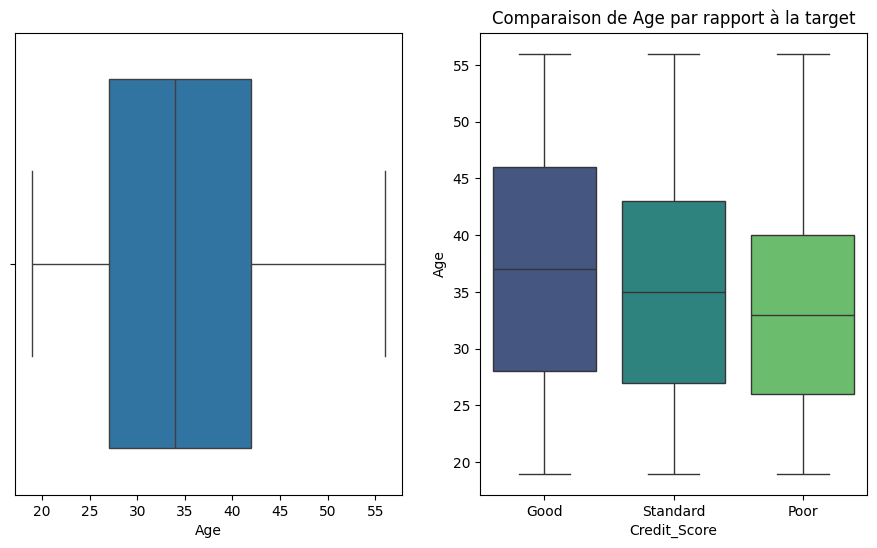

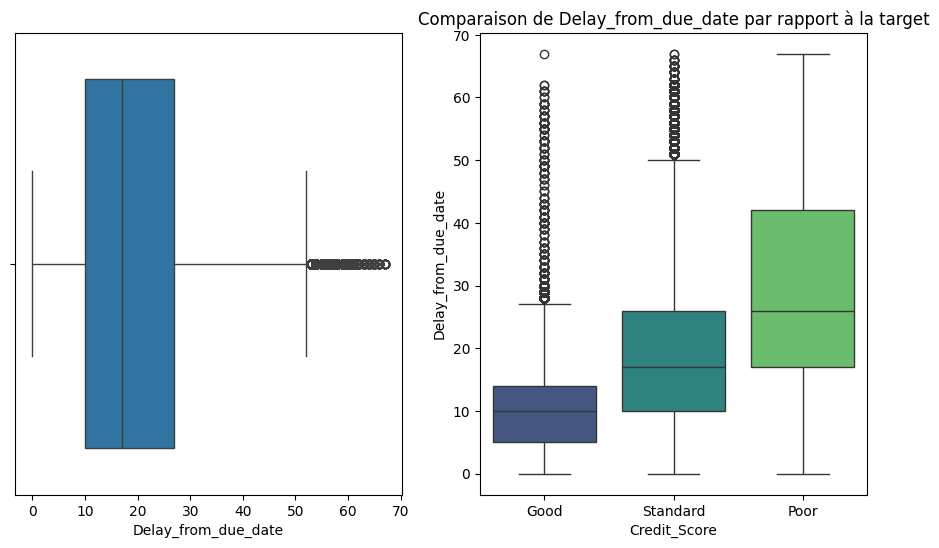

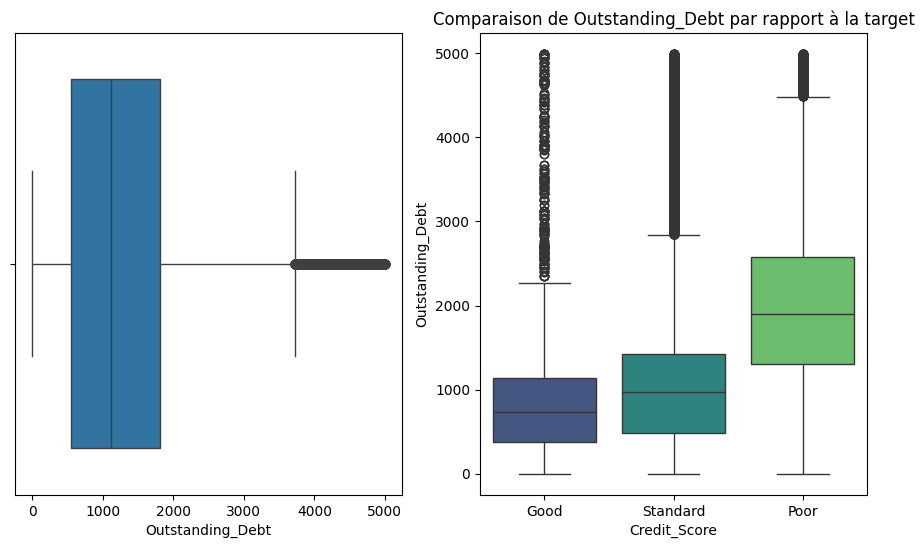

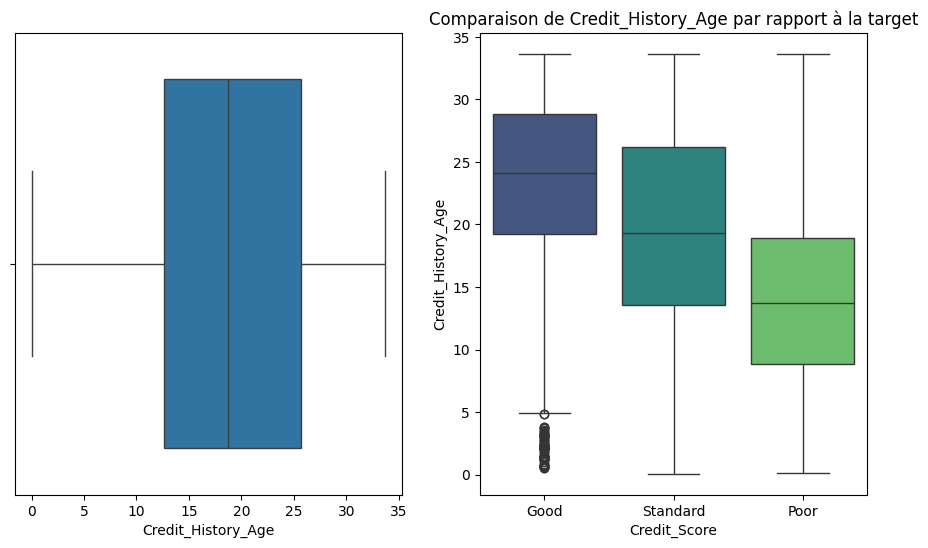

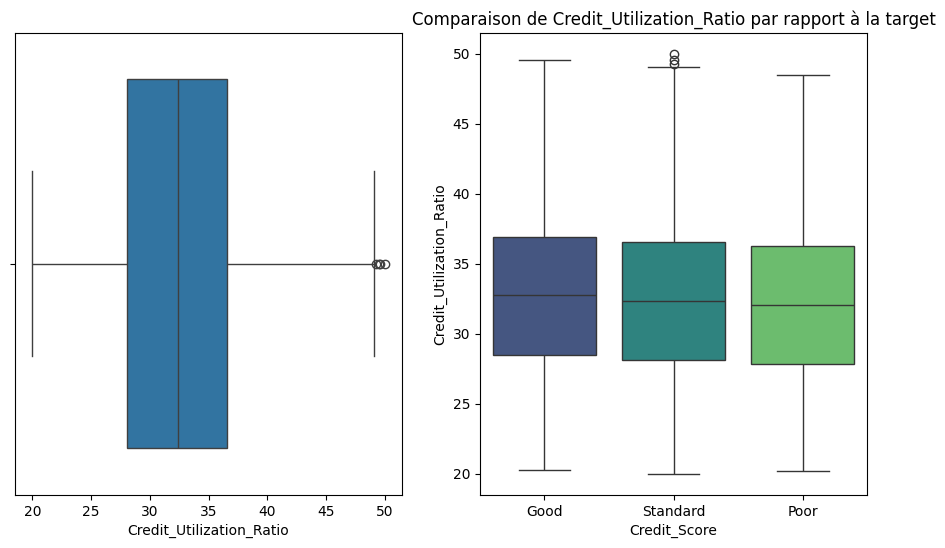

In [132]:
for col in ["Age","Delay_from_due_date","Outstanding_Debt","Credit_History_Age","Credit_Utilization_Ratio"]:
    plt.figure(figsize=(11, 6))
    plt.subplot(1,2,1)
    sns.boxplot(x=col, data=df)
    plt.xlabel(col)
    plt.subplot(1,2,2)
    sns.boxplot(x='Credit_Score', y=col, data=df,palette='viridis')
    plt.title(f'Comparaison de {col} par rapport à la target')
    plt.xlabel('Credit_Score')
    plt.ylabel(col)
    plt.show()

In [133]:
corr_matrix =df_numerical.corr()

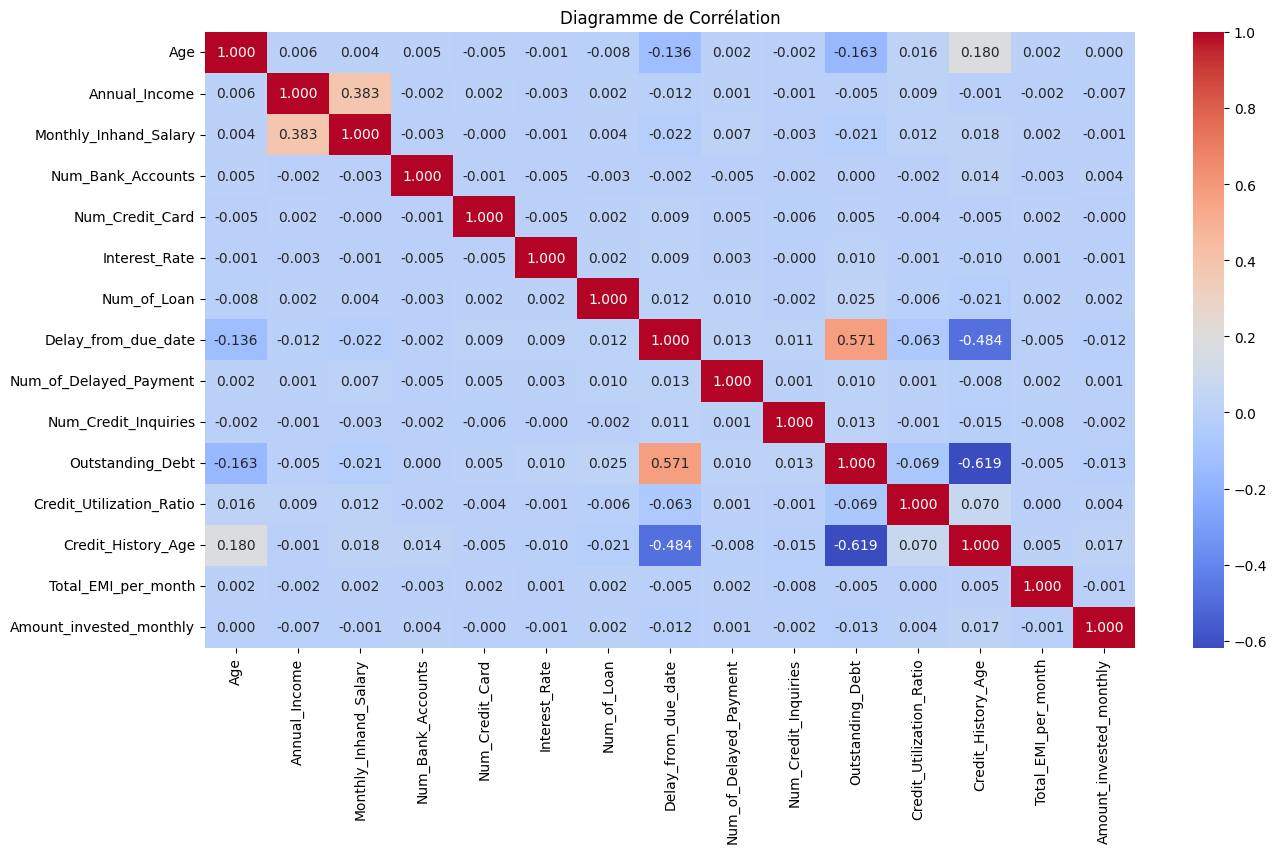

In [134]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Diagramme de Corrélation')
plt.show()

In [135]:
X=df.drop(columns=["Credit_Score"])
y=df["Credit_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_cols
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Occupation', 'Payment_of_Min_Amount']),
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',DecisionTreeClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7258498821945473


In [136]:
from sklearn.ensemble import RandomForestClassifier


In [137]:

X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']


label_encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X[col])
y=y.replace(["Poor", "Standard", "Good"], [0, 1, 2]).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

y_pred = random_forest_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs}")


print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.807640525075732
Mean Squared Error: 0.2012790306294177
Mean Absolute Error: 0.19533266015931786
Explained Variance Score: 0.5608874117260698
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      5063
           1       0.82      0.82      0.82      9490
           2       0.78      0.74      0.76      3273

    accuracy                           0.81     17826
   macro avg       0.80      0.79      0.80     17826
weighted avg       0.81      0.81      0.81     17826



Confusion Matrix:
[[4162  869   32]
 [1033 7819  638]
 [  21  836 2416]]


Text(70.72222222222221, 0.5, 'Valeurs Réelles')

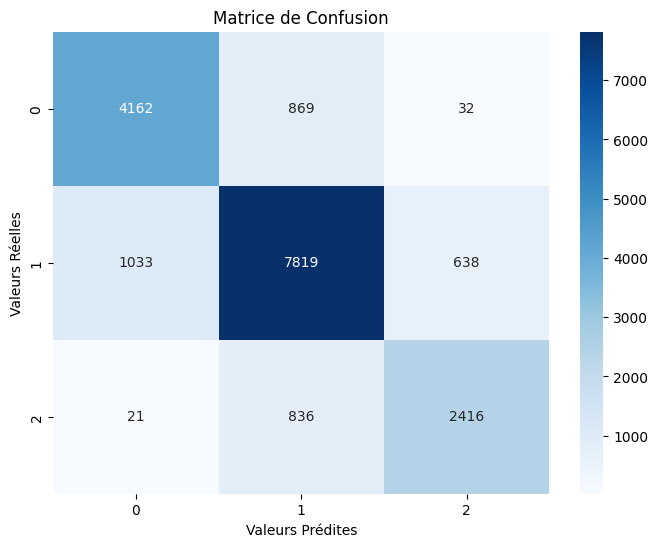

In [138]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')